### Egress time distributions.
### Tests for station, date, and direction variability.

In [10]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%autoreload 2

In [12]:
from time import time
from matplotlib.figure import Figure
from tqdm import tqdm
from fitter import Fitter, get_common_distributions
from math import sqrt
from matplotlib import axes, pyplot
from sigfig import round
import scipy.stats
from statistics import mean, stdev
from yaml import dump

In [13]:
DB_PATH = "/home/justine/Cired/Data/AFC_AVL_2020_02/RERA_202002_test.db"

In [14]:
from f2b.preprocessing.station_egress_time_fitter import Data

In [15]:
def plot_distributions_and_estimations(
    axs: axes.Axes,
    plot_position: list,
    egress_times_by_station: dict,
    fitted_laws: dict,
    station_origin: str,
) -> None:
    "Plot the observed distribution and the estimated law of egress times in each station."

    colors_4am = ["#2a225d", "#c83576", "#ffbe7d", "#e9f98f", "#eaf7ff"]

    plot_row = plot_position[0]
    plot_column = plot_position[1]
    axs[plot_row, plot_column].hist(
        egress_times_by_station[station_origin], bins=300, color=colors_4am[0]
    )
    axs[plot_row, plot_column].axis(ymin=0, ymax=30)
    axs[plot_row, plot_column].set_title("from "+ station_origin + " to " + "VIN")

    ax2 = axs[plot_row, plot_column].twinx()
    egress_times_by_station[station_origin].sort()

    for law in best_law_info.keys():
        fitted_distrib = law
        fitted_distrib_function = eval("scipy.stats." + law)

    ax2label = fitted_distrib + "\n"
    mean, var = fitted_distrib_function.stats(**best_law_info[fitted_distrib], moments = 'mv')
    ax2label += "mean: " + str(mean)[0:4] + "\n std: " + str(sqrt(var))[0:4]
    ax2.plot(
        egress_times_by_station[station_origin],
        fitted_distrib_function.pdf(
            egress_times_by_station[station_origin],
            **best_law_info[fitted_distrib],
        ),
        color=colors_4am[1],
        label=ax2label,
    )
    ax2.axis(ymin=0, ymax=0.02)
    pyplot.legend(loc="upper right")
    pyplot.xlim([0, 300])

In [20]:
dates = ["04/02/2020"]
stations = ["VIN", "NAT", "LYO", "CHL", "AUB","DEF", "RUE"]

  0%|          | 0/6 [00:00<?, ?it/s]

NAT: 464 egress_times, average = 87.48060344827586, standard deviation = 35.23153363187686.


 17%|█▋        | 1/6 [00:01<00:06,  1.24s/it]

LYO: 856 egress_times, average = 87.14135514018692, standard deviation = 32.57656560985791.


 33%|███▎      | 2/6 [00:02<00:05,  1.39s/it]

CHL: 802 egress_times, average = 90.7780548628429, standard deviation = 33.07054642587344.


 50%|█████     | 3/6 [00:04<00:04,  1.43s/it]

AUB: 405 egress_times, average = 88.65679012345679, standard deviation = 31.43858124440873.


 67%|██████▋   | 4/6 [00:05<00:02,  1.28s/it]

DEF: 594 egress_times, average = 92.3097643097643, standard deviation = 39.389545084980256.


 83%|████████▎ | 5/6 [00:06<00:01,  1.36s/it]

RUE: 160 egress_times, average = 104.85625, standard deviation = 45.1993274947188.


100%|██████████| 6/6 [00:07<00:00,  1.28s/it]


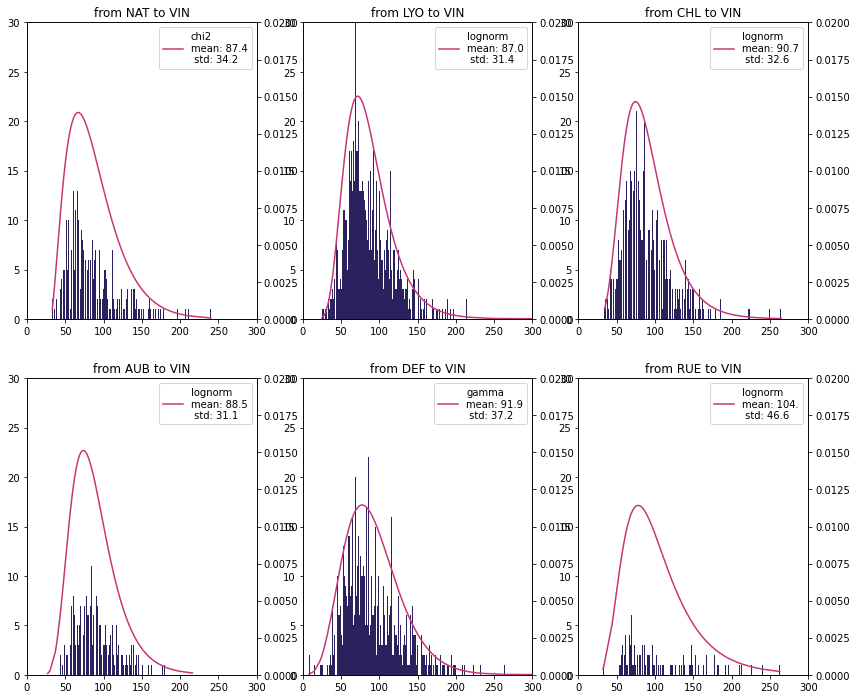

In [21]:
egress_times_by_station = {}

row_nbr = 2
column_nbr = 3
fig, axs = pyplot.subplots(row_nbr, column_nbr, figsize=(14, 12))
plot_row = 0
plot_column = 0

result_output_writing = {}

station_estimation = stations[0]
for station_origin in tqdm(stations[1:]):
    stations_origin = [station_origin]
    data = Data(station_estimation, dates, stations_origin, False)
    egress_times_by_station[station_origin] = data.egress_times
    print(
        f"{station_origin}: {len(data.egress_times)} egress_times, average = {mean(data.egress_times)}, standard deviation = {stdev(data.egress_times)}."
    )

    # Find best probability law fitting the egress time distribution.
    f = Fitter(
        egress_times_by_station[station_origin],
        distributions=get_common_distributions(),
    )
    f.fit()
    best_law_info = f.get_best()

    # Format estimated parameters, write distributions and parameters in fitted_laws.
    for law in best_law_info.keys():
        param_dict = {}
        for param_name in best_law_info[law].keys():
            best_law_info[law][param_name] = round(
                best_law_info[law][param_name], sigfigs=3
            )
            param_dict.update({param_name: float(best_law_info[law][param_name])})
        result_output_writing.update(
            {station_origin: {"distribution": law, "parameters": param_dict}}
        )

    # Plot egress time distribution and fitted law.
    if plot_row < column_nbr:
        plot_distributions_and_estimations(
            axs,
            [plot_row, plot_column],
            egress_times_by_station,
            best_law_info,
            station_origin,
        )

    # Update plot position.
    plot_row = plot_row + (plot_column + 1) // column_nbr
    plot_column = (plot_column + 1) % column_nbr

In [25]:
dates = ["06/02/2020"]
stations = ["VIN", "NAT", "LYO", "CHL", "AUB", "DEF", "RUE"]

  0%|          | 0/6 [00:00<?, ?it/s]

NAT: 519 egress_times, average = 85.77071290944123, standard deviation = 31.735870441139664.


 17%|█▋        | 1/6 [00:01<00:06,  1.26s/it]

LYO: 935 egress_times, average = 84.25561497326203, standard deviation = 31.346852620124146.


 33%|███▎      | 2/6 [00:02<00:05,  1.47s/it]

CHL: 847 egress_times, average = 86.66115702479338, standard deviation = 41.23515209623537.


 50%|█████     | 3/6 [00:04<00:04,  1.45s/it]

AUB: 419 egress_times, average = 87.76610978520286, standard deviation = 28.81715492694607.


 67%|██████▋   | 4/6 [00:05<00:02,  1.32s/it]

DEF: 548 egress_times, average = 87.9580291970803, standard deviation = 36.863750189177914.


 83%|████████▎ | 5/6 [00:06<00:01,  1.34s/it]

RUE: 136 egress_times, average = 103.52941176470588, standard deviation = 51.05595204921182.


100%|██████████| 6/6 [00:07<00:00,  1.30s/it]


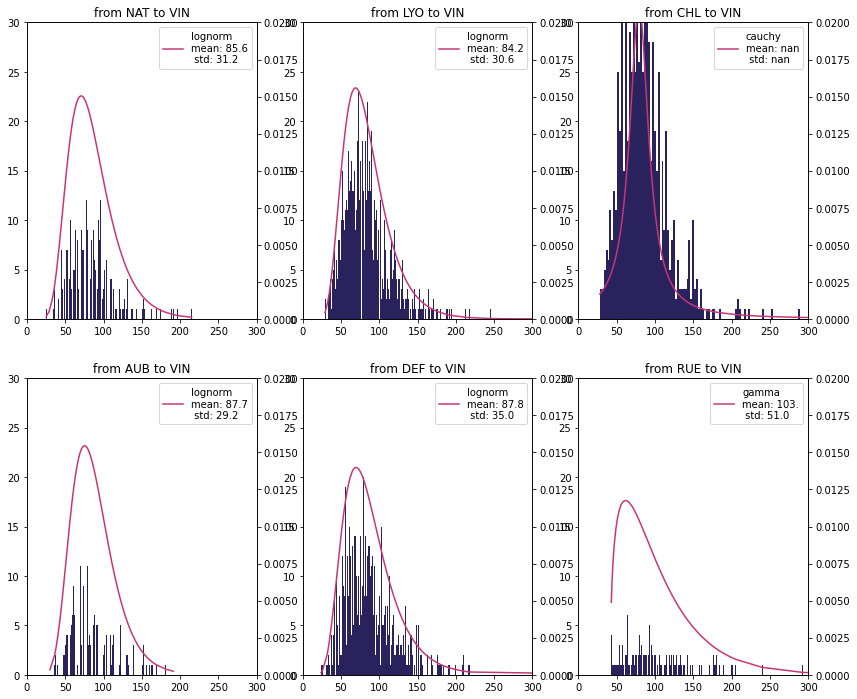

In [26]:
egress_times_by_station = {}

row_nbr = 2
column_nbr = 3
fig, axs = pyplot.subplots(row_nbr, column_nbr, figsize=(14, 12))
plot_row = 0
plot_column = 0

result_output_writing = {}

station_estimation = stations[0]
for station_origin in tqdm(stations[1:]):
    stations_origin = [station_origin]
    data = Data(station_estimation, dates, stations_origin, False)
    egress_times_by_station[station_origin] = data.egress_times
    print(
        f"{station_origin}: {len(data.egress_times)} egress_times, average = {mean(data.egress_times)}, standard deviation = {stdev(data.egress_times)}."
    )

    # Find best probability law fitting the egress time distribution.
    f = Fitter(
        egress_times_by_station[station_origin],
        distributions=get_common_distributions(),
    )
    f.fit()
    best_law_info = f.get_best()

    # Format estimated parameters, write distributions and parameters in fitted_laws.
    for law in best_law_info.keys():
        param_dict = {}
        for param_name in best_law_info[law].keys():
            best_law_info[law][param_name] = round(
                best_law_info[law][param_name], sigfigs=3
            )
            param_dict.update({param_name: float(best_law_info[law][param_name])})
        result_output_writing.update(
            {station_origin: {"distribution": law, "parameters": param_dict}}
        )

    # Plot egress time distribution and fitted law.
    if plot_row < column_nbr:
        plot_distributions_and_estimations(
            axs,
            [plot_row, plot_column],
            egress_times_by_station,
            best_law_info,
            station_origin,
        )

    # Update plot position.
    plot_row = plot_row + (plot_column + 1) // column_nbr
    plot_column = (plot_column + 1) % column_nbr

In [59]:
dates = ["04/02/2020"]
stations = ["NAT", "LYO", "CHL", "AUB", "ETO", "DEF", "RUE"]

  0%|          | 0/6 [00:00<?, ?it/s]

LYO: 841 egress_times, average = 113.2461355529132, standard deviation = 23.978314854521283.


 17%|█▋        | 1/6 [00:01<00:07,  1.52s/it]

CHL: 674 egress_times, average = 118.59347181008901, standard deviation = 27.464541810735657.


 33%|███▎      | 2/6 [00:02<00:05,  1.49s/it]

AUB: 252 egress_times, average = 116.72222222222223, standard deviation = 26.924607411902628.


 50%|█████     | 3/6 [00:03<00:03,  1.26s/it]

ETO: 389 egress_times, average = 109.8508997429306, standard deviation = 23.238973229592045.


 67%|██████▋   | 4/6 [00:05<00:02,  1.24s/it]

DEF: 1763 egress_times, average = 112.48893930799773, standard deviation = 24.5479046397052.


 83%|████████▎ | 5/6 [00:07<00:01,  1.78s/it]

RUE: 537 egress_times, average = 126.39664804469274, standard deviation = 90.037518236766.


100%|██████████| 6/6 [00:09<00:00,  1.52s/it]


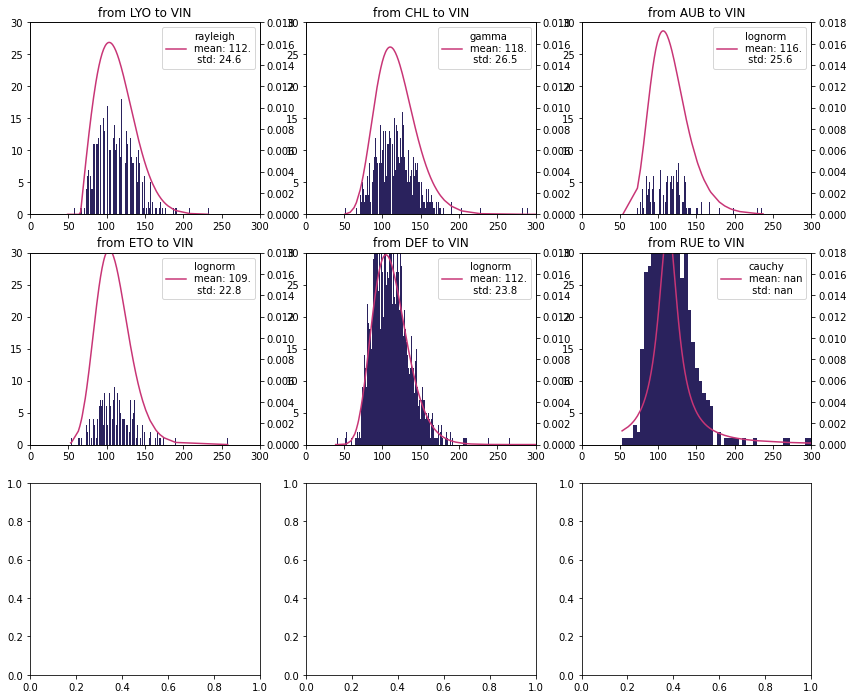

In [60]:
egress_times_by_station = {}

row_nbr = 2
column_nbr = 3
fig, axs = pyplot.subplots(row_nbr, column_nbr, figsize=(14, 12))
plot_row = 0
plot_column = 0

result_output_writing = {}

station_estimation = stations[0]
for station_origin in tqdm(stations[1:]):
    stations_origin = [station_origin]
    data = Data(station_estimation, dates, stations_origin)
    egress_times_by_station[station_origin] = data.egress_times
    print(
        f"{station_origin}: {len(data.egress_times)} egress_times, average = {mean(data.egress_times)}, standard deviation = {stdev(data.egress_times)}."
    )

    # Find best probability law fitting the egress time distribution.
    f = Fitter(
        egress_times_by_station[station_origin],
        distributions=get_common_distributions(),
    )
    f.fit()
    best_law_info = f.get_best()

    # Format estimated parameters, write distributions and parameters in fitted_laws.
    for law in best_law_info.keys():
        param_dict = {}
        for param_name in best_law_info[law].keys():
            best_law_info[law][param_name] = round(
                best_law_info[law][param_name], sigfigs=3
            )
            param_dict.update({param_name: float(best_law_info[law][param_name])})
        result_output_writing.update(
            {station_origin: {"distribution": law, "parameters": param_dict}}
        )

    # Plot egress time distribution and fitted law.
    if plot_row < column_nbr:
        plot_distributions_and_estimations(
            axs,
            [plot_row, plot_column],
            egress_times_by_station,
            best_law_info,
            station_origin,
        )

    # Update plot position.
    plot_row = plot_row + (plot_column + 1) // column_nbr
    plot_column = (plot_column + 1) % column_nbr

In [28]:
dates = ["05/02/2020", "06/02/2020"]
stations = ["NAT", "LYO", "CHL", "AUB", "ETO", "DEF", "RUE"]

  0%|          | 0/6 [00:00<?, ?it/s]

LYO: 1880 egress_times, average = 113.97234042553191, standard deviation = 26.422897984392787.


 17%|█▋        | 1/6 [00:03<00:15,  3.11s/it]

CHL: 1353 egress_times, average = 119.2180339985218, standard deviation = 29.969618244642565.


 33%|███▎      | 2/6 [00:05<00:11,  2.84s/it]

AUB: 533 egress_times, average = 115.97560975609755, standard deviation = 28.36041808176028.


 50%|█████     | 3/6 [00:07<00:07,  2.44s/it]

ETO: 795 egress_times, average = 111.38238993710692, standard deviation = 27.153351089493896.


 67%|██████▋   | 4/6 [00:09<00:04,  2.36s/it]

DEF: 3681 egress_times, average = 112.37000814995925, standard deviation = 24.071688950718663.


 83%|████████▎ | 5/6 [00:15<00:03,  3.52s/it]

RUE: 1205 egress_times, average = 123.70207468879669, standard deviation = 65.06084581745606.


100%|██████████| 6/6 [00:17<00:00,  2.94s/it]


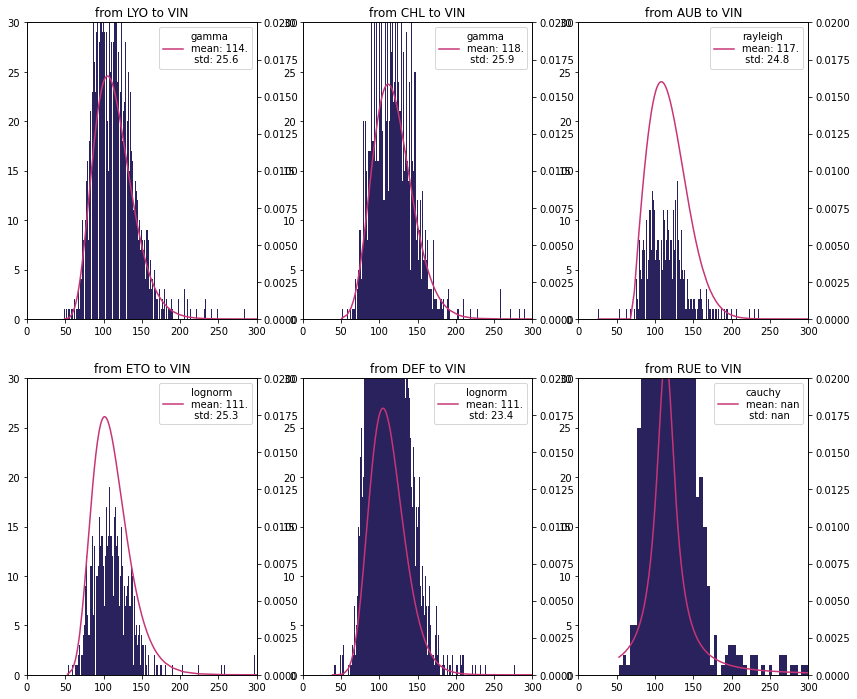

In [30]:
egress_times_by_station = {}

row_nbr = 2
column_nbr = 3
fig, axs = pyplot.subplots(row_nbr, column_nbr, figsize=(14, 12))
plot_row = 0
plot_column = 0

result_output_writing = {}

station_estimation = stations[0]
for station_origin in tqdm(stations[1:]):
    stations_origin = [station_origin]
    data = Data(station_estimation, dates, stations_origin, False)
    egress_times_by_station[station_origin] = data.egress_times
    print(
        f"{station_origin}: {len(data.egress_times)} egress_times, average = {mean(data.egress_times)}, standard deviation = {stdev(data.egress_times)}."
    )

    # Find best probability law fitting the egress time distribution.
    f = Fitter(
        egress_times_by_station[station_origin],
        distributions=get_common_distributions(),
    )
    f.fit()
    best_law_info = f.get_best()

    # Format estimated parameters, write distributions and parameters in fitted_laws.
    for law in best_law_info.keys():
        param_dict = {}
        for param_name in best_law_info[law].keys():
            best_law_info[law][param_name] = round(
                best_law_info[law][param_name], sigfigs=3
            )
            param_dict.update({param_name: float(best_law_info[law][param_name])})
        result_output_writing.update(
            {station_origin: {"distribution": law, "parameters": param_dict}}
        )

    # Plot egress time distribution and fitted law.
    if plot_row < column_nbr:
        plot_distributions_and_estimations(
            axs,
            [plot_row, plot_column],
            egress_times_by_station,
            best_law_info,
            station_origin,
        )

    # Update plot position.
    plot_row = plot_row + (plot_column + 1) // column_nbr
    plot_column = (plot_column + 1) % column_nbr